## Практическое задание
### Используем набор примеров fashion-MNIST
Опишите - какой результата получен в нейросети в зависимости от:  
числа нейронов в слое(для 2-хслойной сети),  
числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).  
фиксируйте для тренировочного и тестового набора метрики accuracy.  
Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.  
Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?  
Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import load_model
import tensorflow as tf

In [2]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


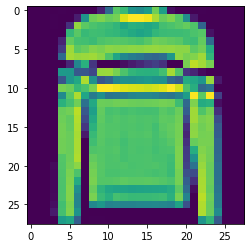

In [3]:
from keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
plt.imshow(train_images[5,:,:])
plt.show()

In [4]:
X_train.min(), X_train.max()

(0, 255)

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [6]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 1. Опишите - какой результат нейросети получен в зависимости от:
числа нейронов в слое (для 2-х слойной сети),  
числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).  
фиксируйте для тренировочного и тестового набора метрики accuracy.

In [7]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)
stats = pd.DataFrame(columns=['Модель', 'Нейроны', 'Train', 'Test'])
best_metric = 0

In [8]:
def model_two_layers(neuron):
    model = Sequential()
    model.add(Dense(neuron[0], input_shape=(28 * 28,), activation='relu'),)
    model.add(Dense(neuron[1], activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
    return model

In [9]:
neurons = [[32, 10], [64, 10], [128, 10]]
for neuron in neurons:
    model2 = model_two_layers(neuron)
    loss_train, metric_train = model2.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model2.evaluate(X_test, y_test, batch_size=10)
    new_row = {'Модель': '2 слоя', 'Нейроны': neuron, 'Train': metric_train, 'Test':metric_test}
    stats = stats.append(new_row, ignore_index=True)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.4073 - accuracy: 0.8549


In [10]:
def model_three_layers(neuron):
    model = Sequential()
    model.add(Dense(neuron[0], input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(neuron[1], activation='relu'))
    model.add(Dense(neuron[2], activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
    return model

In [11]:
neurons = [[32, 16, 10], [64, 32, 10], [128, 64, 10]]
for neuron in neurons:
    model3 = model_three_layers(neuron)
    loss_train, metric_train = model3.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model3.evaluate(X_test, y_test, batch_size=10)
    if metric_test > best_metric:
        best_metric = metric_test
        model3.save('models/02_dz_best_model.h5')
    new_row = {'Модель': '3 слоя', 'Нейроны': neuron, 'Train': metric_train, 'Test':metric_test}
    stats = stats.append(new_row, ignore_index=True)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.3801 - accuracy: 0.8618


In [12]:
def model_five_layers(neuron):
    model = Sequential()
    model.add(Dense(neuron[0], input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(neuron[1], activation='relu'))
    model.add(Dense(neuron[2], activation='relu'))
    model.add(Dense(neuron[3], activation='relu'))
    model.add(Dense(neuron[4], activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
    return model

In [13]:
neurons = [[32, 16, 16, 16, 10], [64, 32, 32, 16, 10], [128, 64, 32, 16, 10]]
for neuron in neurons:
    model5 = model_five_layers(neuron)
    loss_train, metric_train = model5.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model5.evaluate(X_test, y_test, batch_size=10)
    if metric_test > best_metric:
        best_metric = metric_test
        model3.save('models/02_dz_best_model.h5')
    new_row = {'Модель': '5 слоев', 'Нейроны': neuron, 'Train': metric_train, 'Test':metric_test}
    stats = stats.append(new_row, ignore_index=True)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.3769 - accuracy: 0.8630


In [14]:
def model_ten_layers(neuron): 
    model = Sequential()
    model.add(Dense(neuron[0], input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(neuron[1], activation='relu'))
    model.add(Dense(neuron[2], activation='relu'))
    model.add(Dense(neuron[3], activation='relu'))
    model.add(Dense(neuron[4], activation='relu'))
    model.add(Dense(neuron[5], activation='relu'))
    model.add(Dense(neuron[6], activation='relu'))
    model.add(Dense(neuron[7], activation='relu'))
    model.add(Dense(neuron[8], activation='relu'))
    model.add(Dense(neuron[9], activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
    return model

In [15]:
neurons = [[32, 16, 16, 16, 16, 16, 16, 16, 16, 10], 
           [64, 32, 32, 32, 32, 16, 16, 16, 16, 10], 
           [128, 64, 64, 64, 32, 32, 32, 16, 16, 10]]
for neuron in neurons:
    model10 = model_ten_layers(neuron)
    loss_train, metric_train = model10.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model10.evaluate(X_test, y_test, batch_size=10)
    if metric_test > best_metric:
        best_metric = metric_test
        model3.save('models/02_dz_best_model.h5')
    new_row = {'Модель': '10 слоев', 'Нейроны': neuron, 'Train': metric_train, 'Test':metric_test}
    stats = stats.append(new_row, ignore_index=True)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.4577 - accuracy: 0.8435


In [16]:
stats = stats.sort_values('Нейроны')
stats

,Модель,Нейроны,Train,Test
0,2 слоя,"[32, 10]",0.869467,0.8520
3,3 слоя,"[32, 16, 10]",0.873383,0.8570
6,5 слоев,"[32, 16, 16, 16, 10]",0.860317,0.8408
9,10 слоев,"[32, 16, 16, 16, 16, 16, 16, 16, 16, 10]",0.865250,0.8432
1,2 слоя,"[64, 10]",0.873333,0.8548
4,3 слоя,"[64, 32, 10]",0.882300,0.8645
7,5 слоев,"[64, 32, 32, 16, 10]",0.878083,0.8557
10,10 слоев,"[64, 32, 32, 32, 32, 16, 16, 16, 16, 10]",0.872967,0.8558
2,2 слоя,"[128, 10]",0.874500,0.8549
5,3 слоя,"[128, 64, 10]",0.883850,0.8618


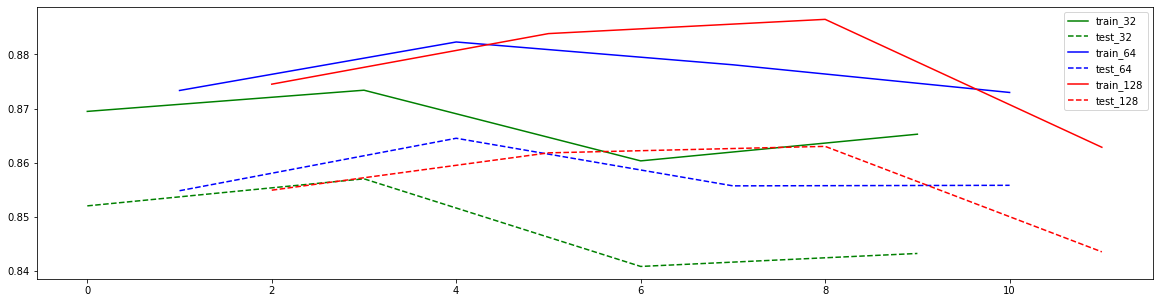

In [17]:
train_acc = stats['Train']
test_acc = stats['Test']
plt.figure(figsize=(20, 5))
plt.plot(train_acc[:4], label='train_32', c='g')
plt.plot(test_acc[:4], label='test_32', c='g', linestyle='--')
plt.plot(train_acc[4:8], label='train_64', c='b')
plt.plot(test_acc[4:8], label='test_64', c='b', linestyle='--')
plt.plot(train_acc[8:], label='train_128', c='r')
plt.plot(test_acc[8:], label='test_128', c='r', linestyle='--')
plt.legend();

### Вывод:
- увеличение количества нейронов в сети не всегда улучшает качество модели  
- увеличение количества слоев без увеличения размера сети не дает ожидаемой линейности (чем больше слоев, тем выше результат).  

### 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.¶

In [18]:
model = load_model('models/02_dz_best_model.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [19]:
stats_optim = pd.DataFrame(columns=['Слоев', 'Оптимизатор', 'Train', 'Test'])
optimizers = {'SGD': keras.optimizers.SGD(),
              'RMSprop': keras.optimizers.RMSprop(),
              'Adam': keras.optimizers.Adam()}
model_i = model
layers = len(model.get_config()['layers'])-1
for i, i_optim in optimizers.items():
    model_i.compile(loss='categorical_crossentropy', optimizer=i_optim, metrics=['accuracy'])
    model_i.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
    loss_train, metric_train = model_i.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model_i.evaluate(X_test, y_test, batch_size=10)
    new_row = {'Слоев': layers, 'Оптимизатор': i, 'Train': metric_train, 'Test': metric_test}
    stats_optim = stats_optim.append(new_row, ignore_index=True)

1000/1000 [==============================] - 1s 976us/step - loss: 0.3953 - accuracy: 0.8712


### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

In [20]:
stats_optim

,Слоев,Оптимизатор,Train,Test
0,3,SGD,0.889650,0.8664
1,3,RMSprop,0.870083,0.8461
2,3,Adam,0.893867,0.8712


### Вывод:
- качество модели повысилось при применении 3-х слойной нейросети (128, 64, 10) и оптимизатора SGD

### 4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [21]:
model_f = model
model_f.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])   
model_f.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
predicted_outputs = np.argmax(model_f.predict(X_test), axis=1)
expected_outputs = np.argmax(y_test, axis=1)
predicted_confusion_matrix = confusion_matrix(expected_outputs, predicted_outputs)
print(predicted_confusion_matrix)

[[833   2  17  14   6   1 115   0  12   0]
 [  2 969   3  17   3   2   3   0   1   0]
 [ 16   1 788   7 119   0  63   0   6   0]
 [ 18   6  21 877  43   0  31   0   4   0]
 [  0   0  90  22 849   0  34   0   5   0]
 [  0   0   0   1   0 966   1  18   4  10]
 [115   1  95  28  91   0 660   0  10   0]
 [  0   0   0   0   0  10   0 963   1  26]
 [  2   0   4   5   3   2   3   2 979   0]
 [  0   1   0   0   0   7   1  38   0 953]]


In [22]:
pred = model_f.predict(X_test)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.79      0.78      1000
           3       0.90      0.88      0.89      1000
           4       0.76      0.85      0.80      1000
           5       0.98      0.97      0.97      1000
           6       0.72      0.66      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

